# Índice de Pegada de Carbono Alimentar 2018

Dataset disponível no site: https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018

Para aprofundar o debate acerca do indíce de pegada de carbono baseado na produção/consumo de alimentos, foi realizado um estudo que analisa a pegada de carbono da indústria de alimentos, comparando diretamente diferentes dietas em termos de emissões de dióxido de carbono. A pesquisa, que revela as emissões anuais de CO2 por pessoa para 130 nações em todo o mundo, mostra quais países poderiam reduzir significativamente sua pegada de carbono mudando para uma dieta baseada em vegetais, bem como quais tipos de alimentos geram as maiores emissões de dióxido de carbono.

O estudo analisa dados da Organização das Nações Unidas para Agricultura e Alimentação (FAO) para determinar a quantidade de produtos fornecidos para consumo de 11 tipos de alimentos para todos os países pesquisados. Usando dados de emissões de CO2, a pegada de carbono per capita é então calculada para cada tipo de alimento. Isso permite uma comparação direta do CO2 produzido para cada tipo de alimento, bem como entre sete produtos de origem animal e quatro produtos não animais. Por fim, para determinar a classificação final do índice, foi calculada a diferença entre o total de CO2 produzido pela quantidade de produto animal ingerido por uma pessoa em um país versus o total de produto não animal. Este número revela a diferença em kgs de CO2 emitidos por produto animal versus produto não animal. O resultado é um balanço que serve como um indicador do potencial de economia da pegada de carbono por cidadão por ano, se eles mudarem de uma dieta animal para uma dieta não animal.

As perguntas que queremos responder são:

1 - Qual a **quantidade total** de alimentos de origem animal, em kg, que o **Brasil** fornece por pessoa/ano (relativo aos produtos citados na pesquisa)? E de origem vegetal? Qual a **média** e **mediana** das quantidades fornecidas?

2 - Qual a **quantidade total** de CO2, em kg, que o **Brasil** produz por pessoa/ano consumindo produtos de origem animal (relativo aos produtos citados na pesquisa)? E de origem vegetal? Como esse valor é comparado com a média mundial?

3 - Qual a diferença entre o consumo de produtos de origem animal e de origem vegetal no Brasil?

4 - Quais os **5 países** que mais emitem CO2, em kg, por pessoa/ano consumindo produtos de origem animal? E quais países são os que menos consomem?

5 - Em qual posição o **Brasil** se encontra na lista de países que mais consomem produtos de origem animal?

6 - Em qual posição o **Brasil** se encontra na lista de países que mais consomem produtos de origem vegetal?

# Começando nossa pesquisa:

O primeiro passo é importar as biblioteca que nos ajudarão na exploração e visualização dos dados. Assim sendo, iremos abrir o arquivo e visualizar as primeiras 11 linhas para uma rápida análise de nossos dados.

In [79]:
# importando bibliotecas

In [80]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
# lendo o arquivo

In [82]:
food = pd.read_csv("food_consumption.csv", index_col=[0])

In [83]:
# Primeiras 11 linhas do DataFrame (que foi chamado de variável: food)

In [84]:
print(food.head(11))

      country food_category  consumption  co2_emission
1   Argentina          pork        10.51         37.20
2   Argentina       poultry        38.66         41.53
3   Argentina          beef        55.48       1712.00
4   Argentina     lamb_goat         1.56         54.63
5   Argentina          fish         4.36          6.96
6   Argentina          eggs        11.39         10.46
7   Argentina         dairy       195.08        277.87
8   Argentina         wheat       103.11         19.66
9   Argentina          rice         8.77         11.22
10  Argentina      soybeans         0.00          0.00
11  Argentina          nuts         0.49          0.87


In [85]:
# Quantidade de linhas e colunas do DataFrame

In [86]:
print(food.shape)

(1430, 4)


In [87]:
# Nome das colunas do DataFrame

In [88]:
print(food.columns)

Index(['country', 'food_category', 'consumption', 'co2_emission'], dtype='object')


# Entendendo nossos dados:

Este estudo analisa 130 países ao redor do mundo para determinar a quantidade de dióxido de carbono (CO2) que cada país emite, com base em sua dieta. Isso é calculado através da quantidade de alimentos fornecidos para consumo e quantos kg de CO2 por kg de produto, por pessoa anualmente. Esses dados em nível de país são divididos entre dietas baseadas em animais e não baseadas em animais.

Os dados analisam a quantidade de produtos animais (porco, aves, carne bovina, ovina e caprina, peixe, ovos e leite - incluindo queijo) e produtos não animais (trigo e produtos de trigo, arroz, soja, nozes - incluindo manteiga de amendoim ) que é fornecido para consumo em cada país.

consumption => Fornecido para consumo (kg/pessoa/ano): A quantidade de alimentos, em kg, que um país fornece para consumo. Como se trata de um valor de oferta destinado ao consumo, também pode incluir uma porcentagem de alimentos que não seriam consumidos, como o desperdício de alimentos.

co2_emission => Kg CO2/pessoa/ano: Com base na quantidade de alimentos fornecidos para consumo, este número indica quantos kg de CO2 são produzidos anualmente por pessoa.

# 1 - Qual a quantidade total de alimentos de origem animal, em kg, que o Brasil fornece por pessoa/ano (relativo aos produtos citados na pesquisa)? E de origem vegetal? Qual a média e mediana das quantidades fornecidas?

In [89]:
# Filtrar para Brasil

In [90]:
animal = ['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy']
veg = ['wheat', 'rice', 'soybeans', 'nuts']
br_animal = food[(food['country'] == 'Brazil') & (food.food_category.isin(animal))]
br_vegetal = food[(food['country'] == 'Brazil') & (food.food_category.isin(veg))]

In [91]:
# Calcular a quantidade total dos alimentos de origem animal listados em kg/pessoa/ano

In [92]:
print(br_animal.groupby("country")['consumption'].agg(['sum', np.mean, np.median]))

            sum       mean  median
country                           
Brazil   265.74  37.962857    12.6


In [93]:
# Calcular a quantidade total dos alimentos de origem vegetal listados em kg/pessoa/ano

In [94]:
print(br_vegetal.groupby("country")['consumption'].agg(['sum', np.mean, np.median]))

           sum    mean  median
country                       
Brazil   89.42  22.355  17.875


In [95]:
# Mostrar DataFrame apenas no Brasil

In [96]:
food_brasil = food[food['country'] == 'Brazil']

In [97]:
print(food_brasil.head(11))

   country food_category  consumption  co2_emission
89  Brazil          pork        12.60         44.60
90  Brazil       poultry        45.00         48.34
91  Brazil          beef        39.25       1211.17
92  Brazil     lamb_goat         0.62         21.71
93  Brazil          fish        10.01         15.98
94  Brazil          eggs         8.98          8.25
95  Brazil         dairy       149.28        212.63
96  Brazil         wheat        53.00         10.11
97  Brazil          rice        32.13         41.12
98  Brazil      soybeans         3.62          1.63
99  Brazil          nuts         0.67          1.19


# 2 - Qual a **quantidade total** de CO2, em kg, que o **Brasil** produz por pessoa/ano consumindo produtos de origem animal (relativo aos produtos citados na pesquisa)? E de origem vegetal? Como esse valor é comparado com a média mundial?


In [98]:
# origem animal:
print("origem animal:")
print(br_animal.groupby("country")['co2_emission'].sum())
print("")
print("origem vegetal:")
# origem vegetal:
print(br_vegetal.groupby("country")['co2_emission'].sum())


origem animal:
country
Brazil    1562.68
Name: co2_emission, dtype: float64

origem vegetal:
country
Brazil    54.05
Name: co2_emission, dtype: float64


In [99]:
# filtrando as categorias de alimentos para todos os produtos de origem animal listados
food_animal = food[(food["food_category"] == 'pork') | 
                   (food["food_category"] == 'poultry') | 
                   (food["food_category"] == 'beef') | 
                   (food["food_category"] == 'lamb_goat') | 
                   (food["food_category"] == 'fish') | 
                   (food["food_category"] == 'eggs') | 
                   (food["food_category"] == 'dairy')
                  ] 
# Encontrando a média a nivel mundial de CO2 produzido pelo consumo de produtos de origem animal
print(food_animal['co2_emission'].sum() / len(food["country"].unique()))

759.2775384615384


Podemos observar que a produção de CO2 no Brasil está maior que a média mundial. Enquanto a média mundial é de 759.28 kg de CO2 por pessoa/ano, o Brasil produz 1562.68 kg. Isto equivale a mais que o dobro da média.

# 3 - Qual a diferença entre o consumo de produtos de origem animal e de origem vegetal no Brasil?

In [100]:
br_animal_co2 = br_animal.groupby("country")['co2_emission'].sum()
br_vegetal_co2 = br_vegetal.groupby("country")['co2_emission'].sum()
br_vegano = br_animal_co2 - br_vegetal_co2
print(br_vegano)

country
Brazil    1508.63
Name: co2_emission, dtype: float64


A diferença é de aproximadamente 1508 kg de CO2. Isso mostra que no Brasil, há uma grande diferença entre o consumo de produtos de origem animal e vegetal. Também mostra que o país pode diminuir significativamente sua pegada de carbono mudando para uma dieta baseada em vegetais.

# 4 - Quais os 5 países que mais emitem CO2, em kg, por pessoa/ano consumindo produtos de origem animal? E quais sao os países que menos emitem?

In [101]:
# agrupando e calculando a soma da emissão de CO2 por país
print("países que mais consomem:")
print(food_animal.groupby('country')['co2_emission'].sum().sort_values(ascending=False).head())
print("")
print("países que menos consomem:")
print(food_animal.groupby('country')['co2_emission'].sum().sort_values().head())

países que mais consomem:
country
Argentina      2140.65
Australia      1895.56
Albania        1733.73
New Zealand    1709.81
Iceland        1705.55
Name: co2_emission, dtype: float64

países que menos consomem:
country
Liberia        77.44
Mozambique    104.02
Sri Lanka     145.06
Togo          146.02
Bangladesh    149.55
Name: co2_emission, dtype: float64


Uma informação que podemos analisar através do estudo dos dados é que países da África consomem menos produtos de origem animal. A África é o continente onde hoje se concentram os países mais pobres do mundo. De acordo com uma reportagem da BBC realizada em 9 de fevereiro de 2019, entitulada: **Carne na alimentação: quais países lideram o ranking?**, é relatado: 

"No outro extremo do espectro, em muitos dos países mais pobres do mundo, come-se pouca carne. O etíope médio, por exemplo, consome apenas 7 kg, os ruandeses, 8 kg, e os nigerianos, 9 kg. Trata-se de um patamar dez vezes menor que o da média europeia."

In [102]:
# agrupando e calculando a soma do fornecimento de produtos de origem animal por país
print(food_animal.groupby('country')['consumption'].sum().sort_values().head())

country
Rwanda        17.83
Mozambique    22.71
Liberia       23.40
Malawi        27.64
Zambia        29.62
Name: consumption, dtype: float64


# 5 - Em qual posição o Brasil se encontra na lista de países que mais consomem produtos de origem animal?

In [103]:
print(food_animal.groupby('country')['co2_emission'].sum().sort_values(ascending=False))

country
Argentina      2140.65
Australia      1895.56
Albania        1733.73
New Zealand    1709.81
Iceland        1705.55
                ...   
Bangladesh      149.55
Togo            146.02
Sri Lanka       145.06
Mozambique      104.02
Liberia          77.44
Name: co2_emission, Length: 130, dtype: float64


In [104]:
food_animal_sum = food_animal.groupby('country')['co2_emission'].sum().sort_values(ascending=False)

In [105]:
# transformando em DataFrame para análise e criando a coluna rank
tabela_animal_co2 = pd.DataFrame(food_animal_sum)
tabela_animal_co2["rank"] = tabela_animal_co2["co2_emission"].rank(ascending=False)

In [106]:
print(tabela_animal_co2)

             co2_emission   rank
country                         
Argentina         2140.65    1.0
Australia         1895.56    2.0
Albania           1733.73    3.0
New Zealand       1709.81    4.0
Iceland           1705.55    5.0
...                   ...    ...
Bangladesh         149.55  126.0
Togo               146.02  127.0
Sri Lanka          145.06  128.0
Mozambique         104.02  129.0
Liberia             77.44  130.0

[130 rows x 2 columns]


In [107]:
# encontrando a posição do Brasil nos países que mais produzem CO2 através do consumo de produto animal 
print(tabela_animal_co2.loc["Brazil"])

co2_emission    1562.68
rank               9.00
Name: Brazil, dtype: float64


# 6 - Em qual posição o Brasil se encontra na lista de países que mais consomem produtos de origem vegetal?

In [108]:
food_vegetal = food[(food["food_category"] == 'wheat') | 
                   (food["food_category"] == 'rice') | 
                   (food["food_category"] == 'soybeans') | 
                   (food["food_category"] == 'nuts')
                  ]

food_vegetal_sum = food_vegetal.groupby('country')['co2_emission'].sum().sort_values(ascending=False)

In [109]:
# transformando em DataFrame para análise e criando a coluna rank
tabela_vegetal_co2 = pd.DataFrame(food_vegetal_sum)
tabela_vegetal_co2["rank"] = tabela_vegetal_co2["co2_emission"].rank(ascending=False)

In [110]:
print(tabela_vegetal_co2)

            co2_emission   rank
country                        
Bangladesh        224.63    1.0
Cambodia          208.28    2.0
Vietnam           200.70    3.0
Indonesia         186.33    4.0
Myanmar           179.27    5.0
...                  ...    ...
Namibia            16.27  126.0
Rwanda             15.19  127.0
Paraguay           15.12  128.0
Uganda             14.54  129.0
Ethiopia           11.18  130.0

[130 rows x 2 columns]


In [111]:
# encontrando a posição do Brasil nos países que mais produzem CO2 através do consumo de produto vegetal
print(tabela_vegetal_co2.loc["Brazil"])

co2_emission    54.05
rank            44.00
Name: Brazil, dtype: float64


# BÔNUS - Scatterplot no Seaborn

In [112]:
# Adcionando DataFrame de continentes e adaptando
continent = pd.read_csv("continents2.csv")
continent2 = continent.drop(columns=['iso_3166-2','alpha-2', 'alpha-3', 'country-code', 'sub-region', 'intermediate-region', 'region-code', 'sub-region-code', 'intermediate-region-code'])
continent3 = continent2.rename(columns={'name':'country'})
print(continent3.head())

          country   region
0     Afghanistan     Asia
1   Åland Islands   Europe
2         Albania   Europe
3         Algeria   Africa
4  American Samoa  Oceania


In [113]:
# criando novos DataFrames para fazer um DataFrame final
tabela_animal_co2_v2 = pd.DataFrame(food_animal_sum)
animal_v2 = tabela_animal_co2_v2.reset_index()
tabela_vegetal_co2_v2 = pd.DataFrame(food_vegetal_sum)
vegetal_v2 = tabela_vegetal_co2_v2.reset_index()

# Juntando os 2 DataFrames para um DataFrame final
animal_vegetal = animal_v2.merge(vegetal_v2, on='country', suffixes=('_animal', '_vegetal'))

In [114]:
# Juntando novamente os DataFrames com continent
animal_vegetal_continent = animal_vegetal.merge(continent3, on='country')

In [115]:
dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'}

In [116]:
# Adcionando DataFrame de continentes de população e adaptando
pop = pd.read_csv("population_by_country_2020.csv")
pop2 = pop.drop(columns=['Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
                        'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'])
pop3 = pop2.rename(columns={'Country (or dependency)':'country'})

#Juntando novamente os DataFrames com pop 
animal_vegetal_continent_pop = animal_vegetal_continent.merge(pop3, on="country")

# Diminuindo o size para o mesmo caber no gráfico
size = animal_vegetal_continent_pop['Population (2020)'].tolist()
np.size = np.array(size)
np.size = np.size / 100000

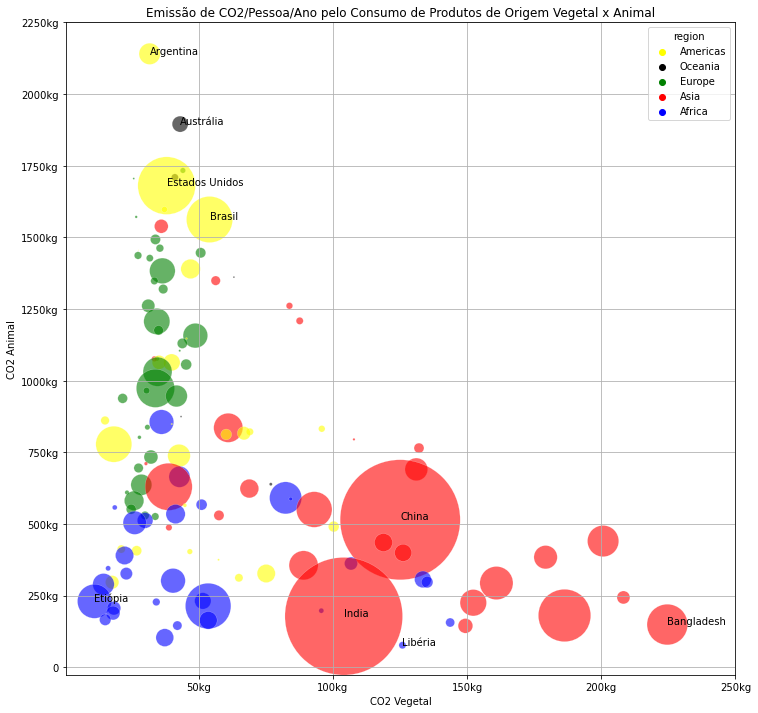

In [118]:
# Fazendo o scatter plot no seaborn
plt.figure(figsize=(12, 12))
sns.scatterplot(data=animal_vegetal_continent_pop, x="co2_emission_vegetal", y="co2_emission_animal", s = np.size, alpha=0.6, hue="region", palette=['yellow',
'black','green','red','blue']).set(title='Emissão de CO2/Pessoa/Ano pelo Consumo de Produtos de Origem Vegetal x Animal')

xlab = 'CO2 Vegetal'
ylab = 'CO2 Animal'

plt.xlabel(xlab)
plt.ylabel(ylab)

x_tick_val = [50, 100, 150, 200, 250]
x_tick_lab = ['50kg', '100kg', '150kg', '200kg', '250kg']
plt.xticks(x_tick_val, x_tick_lab)

y_tick_val = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250]
y_tick_lab = [0, '250kg', '500kg', '750kg', '1000kg', '1250kg', '1500kg', '1750kg', '2000kg', '2250kg']
plt.yticks(y_tick_val, y_tick_lab)

plt.text(54.05, 1562.69, 'Brasil')
plt.text(31.75, 2140.65, 'Argentina')
plt.text(224.64, 149.55, 'Bangladesh')
plt.text(125.09, 515.11, 'China')
plt.text(104.05, 178.57, 'India')
plt.text(43.09, 1895.55, 'Austrália')
plt.text(125.94, 77.45, 'Libéria')
plt.text(11.18, 230.74, 'Etiópia')
plt.text(38.07, 1680.79, 'Estados Unidos')

plt.grid(True)

plt.show()

Podemos observar atráves deste gráfico, que mesmo o Brasil sendo o nono (9) país que mais emite CO2, ele é o país com **maior população dentre os primeiros colocados**. Isso coloca o Brasil em altíssima evidência, pois acaba mostrando que o Brasil é um dos maiores "poluidores" do planeta no sentido de produção de CO2 devido ao consumo de produtos de origem animal. Os países que mais consomem vegetal estão concentrados na Ásia. Outra informação importante que podemos obter através deste análise é de que os países que menos emitem CO2 estão concentrados na África. O fato dos mesmos possuírem baixa taixa de emissão tanto nos produtos de origem animal quanto nos produtos de origem vegetal mostram um triste fato: **Fome**. 

# Conclusão:

O Brasil é o **nono (9)** país que mais emite CO2 através do consumo de produtos de origem animal e o **quadragésimo quarto (44)** que mais emite CO2 através do consumo de produtos de origem vegetal. Isso nos mostra que o país pode diminuir significativamente sua pegada de carbono mudando para uma dieta baseada em vegetais. Nesta pesquisa, foram estudados **130** países. Através do consumo de produtos de origem animal, cada brasileiro produz em média **1.508 kg de CO2**. Para se ter uma ideia, um estudo realizado no Reino Unido mostra que um carro, em média, tem uma emissão de **2.630 kg de CO2** ao ano.

Através de nossa análise de dados, nos é mostrado a importância de uma transformação no mindset do brasileiro em relação ao consumo exagerado de produtos de origem animal. É importante o começo de um processo de educação no povo brasileiro, para que o mesmo, comece a enxergar e entender a importância do aumento de consumo de produtos vegetais, **tanto para a saúde do corpo, como para a saúde do planeta**.